## Import libraries

In [1]:
# Base libraries
import pandas as pd
import numpy as np
from pyforest import *

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")


import pickle
# import yaml


In [28]:
pip install pipreqs

pipreqs C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project

SyntaxError: invalid syntax (899612643.py, line 1)

## Exploring the database

In [2]:
# Open the excel database 
# In Row the 184 countries and the years
health = pd.read_excel('C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Data/Data_Health_Source.xlsx')
pd.set_option('display.max_columns', None)
health.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Country Name,Country Code,Year,"Birth rate (per 1,000 people)",Capital health expenditure (% of GDP),"Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, measles second dose (% of children)","Immunization, Pol3 (% children)","Incidence of HIV (per 1,000 population)","Incidence of malaria (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population growth (annual %),"GDP per capita, PPP ($)",Population,GDP (B$),Prevalence of anemia among children (%),Prevalence of HIV (%),Prevalence of overweight (% of adults),Prevalence of overweight ( % of children ),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,% of adults with hypertension,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)"
0,Afghanistan,AFG,2002,46.901,0.283022,40.157115,14.903117,44.939767,9.443390,81.271034,11.048,9.25,0.084181,0.724469,69.385639,11.160927,7.272,550.0,0.39,0.394258,30.0,36.0,0.02,79.385786,189.0,56.784,9.736509,34.357446,NaN,1300.0,14.9,42.1,85.3,0.3563,85.375610,69.385639,30.236385,0.236064,4.496719,1099.194507,23680871.0,26.029883,48.3,0.1,15.2,5.6,3.30172,77.739,5.468367,5.0,0.21,30.0,57.0,11.257
1,Afghanistan,AFG,2003,46.231,0.571286,40.157115,14.903117,44.939767,8.941258,82.457848,10.704,9.25,0.650963,6.003298,70.970801,5.483747,7.148,550.0,0.39,0.394258,30.0,41.0,0.02,68.091559,189.0,57.271,8.978366,34.357446,NaN,1240.0,15.0,41.5,82.7,0.3563,86.069191,70.970801,32.273722,0.236064,4.668344,1062.249360,24726689.0,26.265910,47.1,0.1,15.6,5.7,3.30172,77.647,1.202340,5.0,0.21,31.1,58.0,11.141
2,Afghanistan,AFG,2004,45.507,0.077893,40.157115,14.903117,44.939767,9.808474,89.470055,10.356,9.25,0.542926,4.952411,75.626884,8.890762,7.016,550.0,0.39,0.394258,2.0,50.0,0.02,37.616466,189.0,57.772,8.315494,34.357446,NaN,1180.0,15.2,41.4,80.0,0.3563,84.527596,75.626884,34.328559,0.236064,4.321560,1136.123214,25654274.0,29.146416,46.2,0.1,16.1,5.7,3.30172,77.500,1.199370,5.0,0.21,32.2,51.0,10.988
3,Afghanistan,AFG,2005,44.723,0.128736,40.157115,14.903117,44.939767,9.948290,100.706985,10.003,9.25,0.529184,5.356955,79.528395,15.821637,6.875,550.0,0.42,0.394258,9.0,58.0,0.02,27.079072,189.0,58.290,7.810411,34.357446,NaN,1140.0,15.2,40.9,77.3,0.5820,78.970085,79.528395,36.401501,0.236064,3.682700,1161.124889,26433058.0,30.692082,45.5,0.1,16.6,5.8,2.57000,77.297,5.468367,5.0,0.21,33.3,47.0,11.217
4,Afghanistan,AFG,2006,43.870,0.365538,40.157115,14.903117,44.939767,10.622766,113.754105,9.645,9.25,0.497840,5.331131,87.391572,21.031413,6.722,550.0,0.42,0.394258,18.0,58.0,0.02,20.526075,189.0,58.826,7.581440,34.357446,NaN,1120.0,15.1,40.5,74

In [3]:
health.shape


(3280, 54)

## Check, replace and drop clolumns with many missing values

In [4]:
health = health.apply(lambda x : x.replace("..", np.nan))
health.tail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Country Name,Country Code,Year,"Birth rate (per 1,000 people)",Capital health expenditure (% of GDP),"Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, measles second dose (% of children)","Immunization, Pol3 (% children)","Incidence of HIV (per 1,000 population)","Incidence of malaria (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population growth (annual %),"GDP per capita, PPP ($)",Population,GDP (B$),Prevalence of anemia among children (%),Prevalence of HIV (%),Prevalence of overweight (% of adults),Prevalence of overweight ( % of children ),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,% of adults with hypertension,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)"
3275,Zimbabwe,ZWE,2017,31.732000,0.073545,53.625769,11.346626,35.027605,7.469752,226.205865,8.044000,5.95,1.794181,54.333036,102.421790,69.451039,3.707000,1350.0,2.35,0.441000,78.0,89.000000,2.740000,118.824397,221.000000,60.812000,1.815294,86.138065,12.728839,458.0000,40.100000,29.30,39.900000,2.59720,22.806246,51.589066,63.996625,0.185900,1.459406,1690.018603,14438812.0,21.67153,39.600000,13.200000,35.113333,3.900000,5.818780,67.763,8.875950,15.000000,4.0725,34.200000,8.3,4.785
3276,Zimbabwe,ZWE,2018,30.676000,0.271347,53.625769,11.346626,35.027605,8.680062,269.203700,7.883000,5.95,2.782935,86.310014,115.134644,67.759041,3.615000,1350.0,2.35,0.461242,78.0,89.000000,2.230000,55.826328,210.000000,61.195000,2.314996,86.138065,12.728839,590.5625,40.600000,28.50,38.800000,1.93460,19.696978,53.024993,63.538773,0.209600,1.410382,1690.018603,14645473.0,21.67153,38.500000,12.800000,35.113333,3.800000,3.866110,67.791,7.749183,14.000000,4.6700,34.900000,7.7,4.796
3277,Zimbabwe,ZWE,2019,29.747000,0.254703,47.647301,13.094471,39.258228,7.703565,208.412329,7.773000,5.95,1.358270,36.746649,110.071773,61.593906,3.531000,1210.0,2.35,0.444875,75.0,90.000000,2.130000,67.874064,199.000000,61.490000,2.314996,86.138065,12.728839,590.5625,41.200000,28.40,38.100000,1.45366,24.376623,50.803887,63.094957,0.127629,1.421142,1690.018603,14862927.0,21.67153,37.800000,12.400000,35.113333,3.700000,5.089862,67.790,7.749183,14.100000,4.0725,35.700000,11.0,4.833
3278,Zimbabwe,ZWE,2020,28.977000,0.254703,53.625769,11.346626,35.027605,7.970021,203.951018,7.692000,5.95,2.089709,53.465777,100.734364,49.750877,3.460000,1140.0,2.35,0.466893,74.0,86.000000,1.740000,98.509331,193.000000,61.738000,2.314996,86.138065,12.728839,590.5625,37.394444,29.25,37.900000,1.45366,27.718539,55.080762,62.666458,0.127629,1.473871,1690.018603,15092171.0,21.67153,45.511111,11.9000

In [5]:
nulls_percent_df = pd.DataFrame(health.isna().sum()/len(health)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

<IPython.core.display.Javascript object>

,column_name,nulls_percentage
0,Country Name,0.000000
1,Country Code,0.000000
2,Year,0.000000
3,"Birth rate (per 1,000 people)",0.000000
4,Capital health expenditure (% of GDP),0.030488
5,"Cause of death, by communicable diseasesl and ...",0.000000
6,"Cause of death, by injury (% of total)",0.000000
7,"Cause of death, by non-communicable diseases (...",0.000000
8,Current health expenditure (% of GDP),0.000000
9,"Current health expenditure per capita, PPP ( $)",0.000000


In [6]:
def threshold(df, threshold ):
    nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>threshold]
    return list(columns_above_threshold['column_name'])
# Test your function here
threshold(health, 0.1)

<IPython.core.display.Javascript object>

['Incidence of HIV  (per 1,000  population)',
 'Incidence of malaria (per 1,000 population)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Low-birthweight babies (% of births)',
 'Prevalence of HIV (%)',
 'Prevalence of overweight ( % of children )']

## Drop the unrelevant columns with many missing values

In [7]:
health.drop(['Incidence of malaria (per 1,000 population)', 'Literacy rate, adult total (% of people ages 15 and above)', 'Low-birthweight babies (% of births)'], axis =1)

,Country Name,Country Code,Year,"Birth rate (per 1,000 people)",Capital health expenditure (% of GDP),"Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, measles second dose (% of children)","Immunization, Pol3 (% children)","Incidence of HIV (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population growth (annual %),"GDP per capita, PPP ($)",Population,GDP (B$),Prevalence of anemia among children (%),Prevalence of HIV (%),Prevalence of overweight (% of adults),Prevalence of overweight ( % of children ),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,% of adults with hypertension,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)"
0,Afghanistan,AFG,2002,46.901000,0.283022,40.157115,14.903117,44.939767,9.443390,81.271034,11.048000,9.25,0.084181,0.724469,69.385639,11.160927,7.272000,550.0,0.39,0.394258,30.0,36.000000,0.020000,189.000000,56.784000,9.736509,1300.0000,14.900000,42.10,85.300000,0.35630,85.375610,69.385639,30.236385,0.236064,4.496719,1099.194507,23680871.0,26.029883,48.300000,0.100000,15.200000,5.600000,3.301720,77.739,5.468367,5.000000,0.2100,30.000000,57.0,11.257
1,Afghanistan,AFG,2003,46.231000,0.571286,40.157115,14.903117,44.939767,8.941258,82.457848,10.704000,9.25,0.650963,6.003298,70.970801,5.483747,7.148000,550.0,0.39,0.394258,30.0,41.000000,0.020000,189.000000,57.271000,8.978366,1240.0000,15.000000,41.50,82.700000,0.35630,86.069191,70.970801,32.273722,0.236064,4.668344,1062.249360,24726689.0,26.265910,47.100000,0.100000,15.600000,5.700000,3.301720,77.647,1.202340,5.000000,0.2100,31.100000,58.0,11.141
2,Afghanistan,AFG,2004,45.507000,0.077893,40.157115,14.903117,44.939767,9.808474,89.470055,10.356000,9.25,0.542926,4.952411,75.626884,8.890762,7.016000,550.0,0.39,0.394258,2.0,50.000000,0.020000,189.000000,57.772000,8.315494,1180.0000,15.200000,41.40,80.000000,0.35630,84.527596,75.626884,34.328559,0.236064,4.321560,1136.123214,25654274.0,29.146416,46.200000,0.100000,16.100000,5.700000,3.301720,77.500,1.199370,5.000000,0.2100,32.200000,51.0,10.988
3,Afghanistan,AFG,2005,44.723000,0.128736,40.157115,14.903117,44.939767,9.948290,100.706985,10.003000,9.25,0.529184,5.356955,79.528395,15.821637,6.875000,550.0,0.42,0.394258,9.0,58.000000,0.020000,189.000000,58.290000,7.810411,1140.0000,15.200000,40.90,77.300000,0.58200,78.970085,79.528395,36.401501,0.236064,3.682700,1161.124889,26433058.0,30.692082,45.500000,0.100000,16.600000,5.800000,2.570000,77.297,5.468367,5.000000,0.2100,33.300000,47.0,11.217
4,Afghanistan,AFG,2006,43.870000,0.365538,40.157115,14.903117,44.939767,10.622766,113.754105,9.645000,9.25,0.497840,5.331131,87.391572,21.031413,6.722000,550.0,0.42,0.394258,18.0,58.000000,

## Check & fill  the missing value per country and per columns

In [8]:
health.isna().sum()

Country Name                                                                          0
Country Code                                                                          0
Year                                                                                  0
Birth rate (per 1,000 people)                                                         0
Capital health expenditure (% of GDP)                                               100
Cause of death, by communicable diseasesl and nutrition conditions (% of total)       0
Cause of death, by injury (% of total)                                                0
Cause of death, by non-communicable diseases (% of total)                             0
Current health expenditure (% of GDP)                                                 0
Current health expenditure per capita, PPP ( $)                                       0
Death rate (per 1,000 people)                                                         0
Diabetes prevalence (% of popula

In [9]:
my_cols = health[health.columns.difference(['Country Name', 'Country Code'])]
List  = my_cols.columns.to_list()

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(my_cols)
health2 = pd.DataFrame(X)
health2.columns = List
health2 = health2.astype(int)
health2[['Country Name', 'Country Code']]=health[['Country Name', 'Country Code']]
health = health2


<IPython.core.display.Javascript object>

In [10]:
health.shape

(3280, 54)

# Selecting columns&rows, check correlation

## Distribution plots of numerical variables

In [11]:
# Get the numerical variables from our dataset.
numerical = health.select_dtypes(include=np.number)
numerical.head()

<IPython.core.display.Javascript object>

,% of adults with hypertension,"Birth rate (per 1,000 people)",Capital health expenditure (% of GDP),"Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GDP (B$),"GDP per capita, PPP ($)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, Pol3 (% children)","Immunization, measles second dose (% of children)","Incidence of HIV (per 1,000 population)","Incidence of malaria (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population,Population growth (annual %),Prevalence of HIV (%),Prevalence of anemia among children (%),Prevalence of overweight ( % of children ),Prevalence of overweight (% of adults),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)",Year
0,30,46,0,40,14,44,9,81,11,9,0,0,69,11,7,26,1099,550,0,0,36,30,0,79,189,56,9,34,15,1300,14,42,85,0,85,69,30,0,23680871,4,0,48,5,15,3,77,5,5,0,57,11,2002
1,31,46,0,40,14,44,8,82,10,9,0,6,70,5,7,26,1062,550,0,0,41,30,0,68,189,57,8,34,13,1240,15,41,82,0,86,70,32,0,24726689,4,0,47,5,15,3,77,1,5,0,58,11,2003
2,32,45,0,40,14,44,9,89,10,9,0,4,75,8,7,29,1136,550,0,0,50,2,0,37,189,57,8,34,10,1180,15,41,80,0,84,75,34,0,25654274,4,0,46,5,16,3,77,1,5,0,51,10,2004
3,33,44,0,40,14,44,9,100,10,9,0,5,79,15,6,30,1161,550,0,0,58,9,0,27,189,58,7,34,13,1140,15,40,77,0,78,79,36,0,26433058,3,0,45,5,16,2,77,5,5,0,47,11,2005
4,34,43,0,40,14,44,10,113,9,9,0,5,87,21,6,34,1284,550,0,0,58,18,0,20,189,58,7,34,12,1120,15,40,74,0,76,87,38,0,27100542,2,0,44,5,17,2,77,5,4,0,43,11,2006


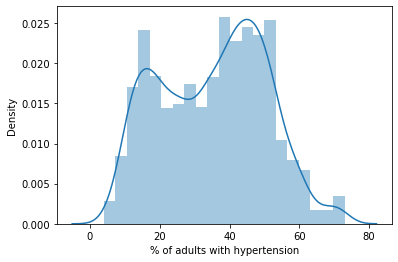

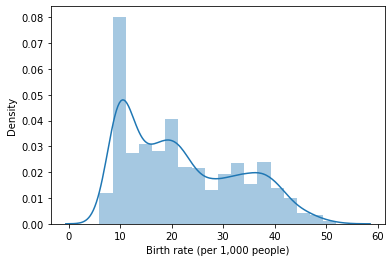

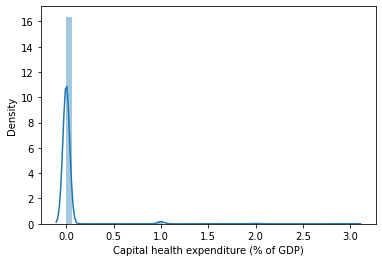

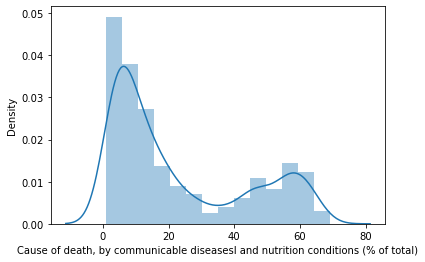

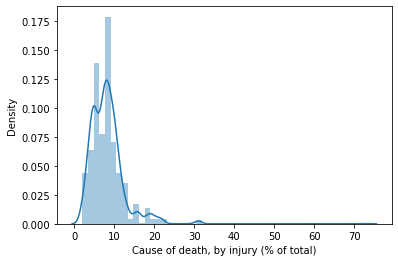

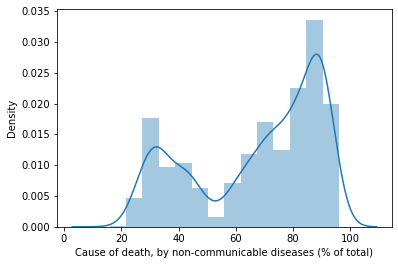

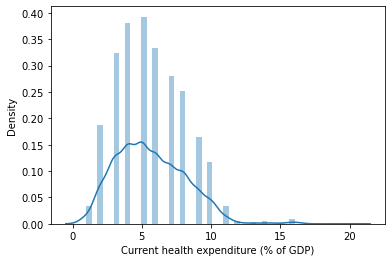

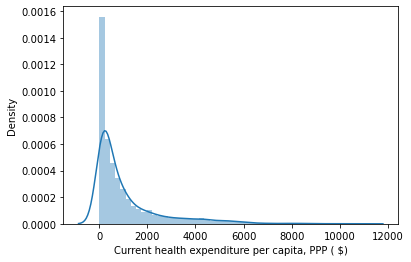

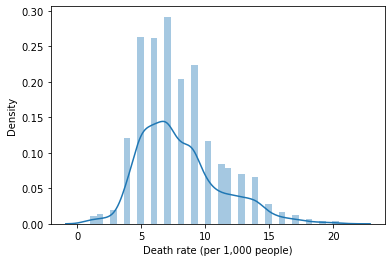

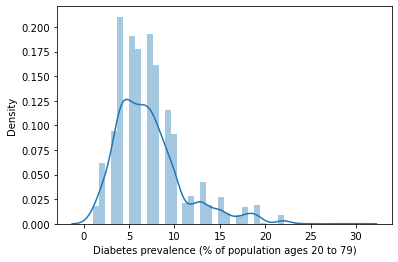

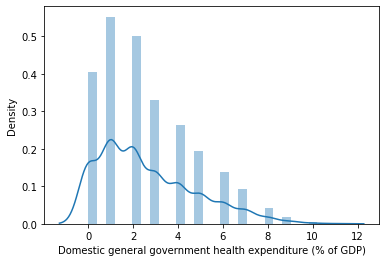

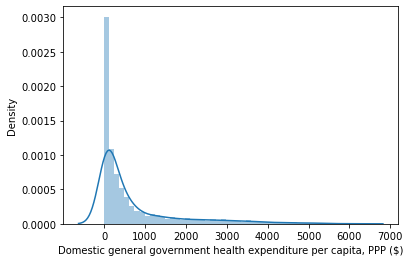

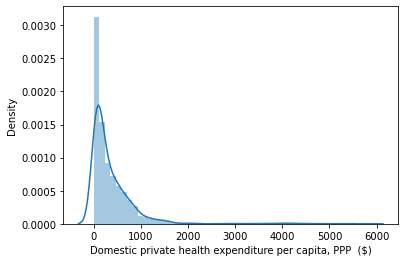

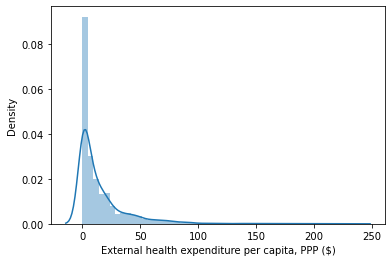

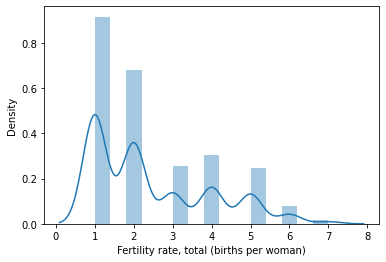

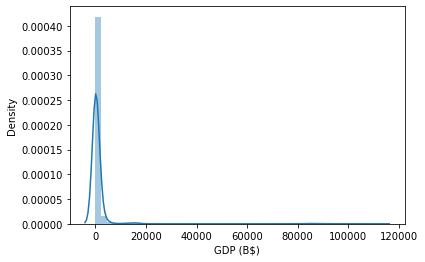

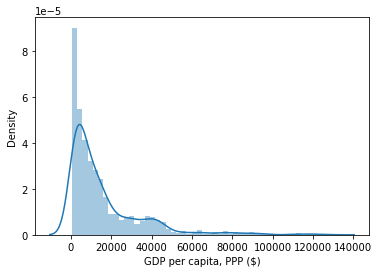

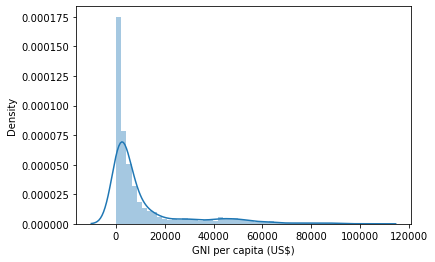

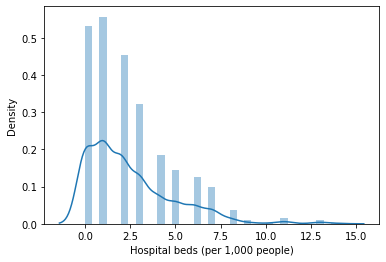

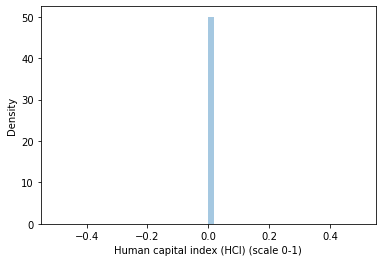

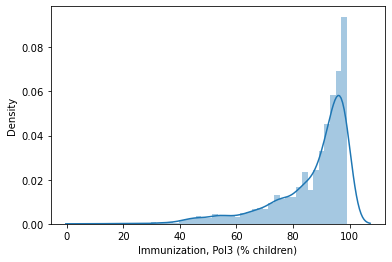

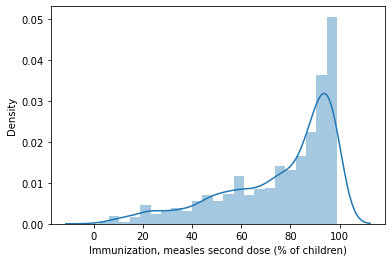

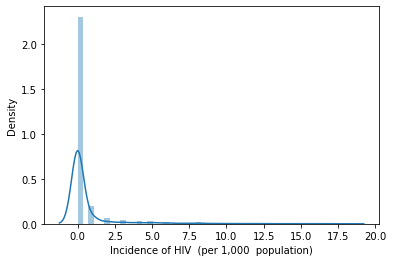

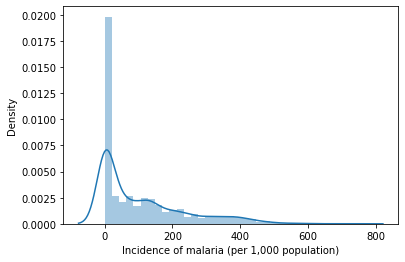

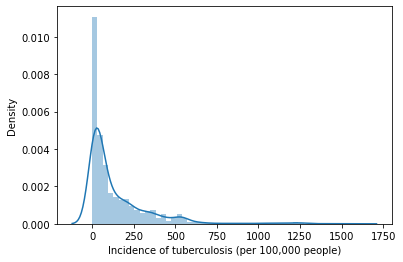

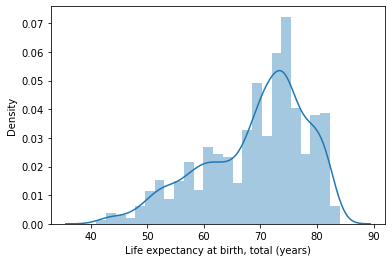

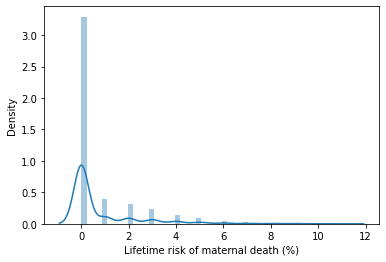

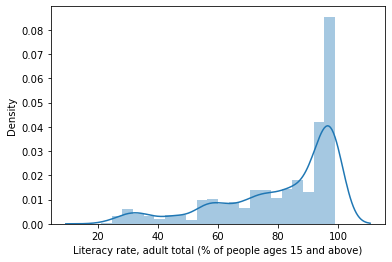

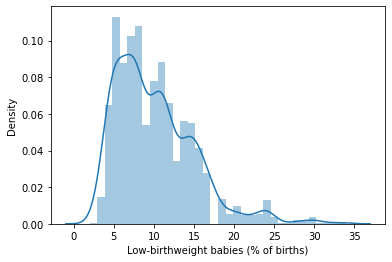

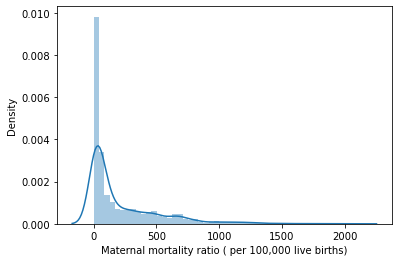

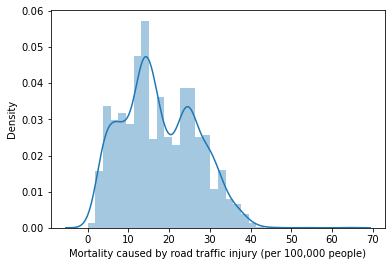

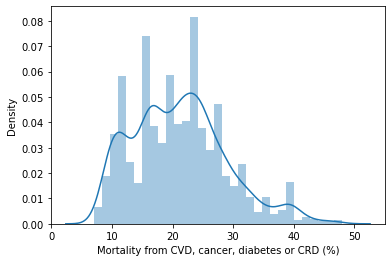

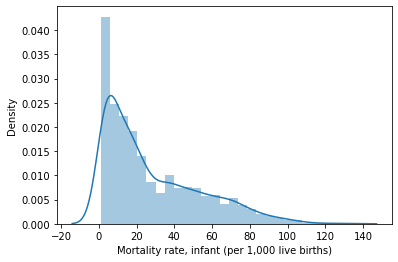

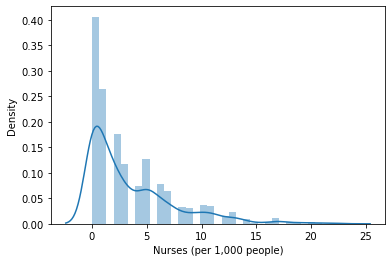

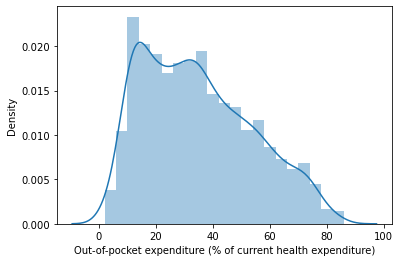

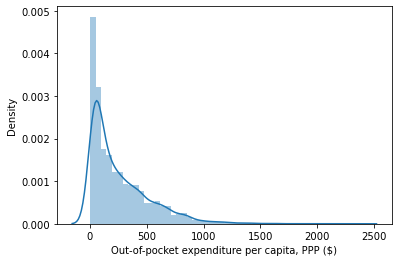

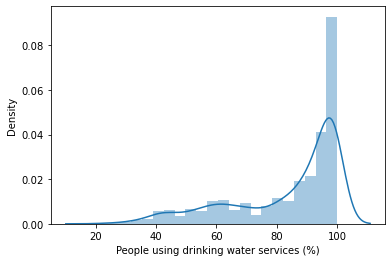

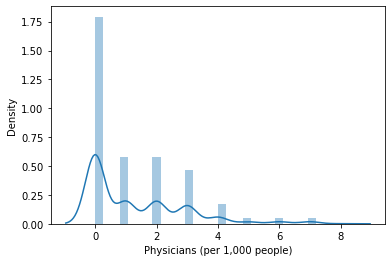

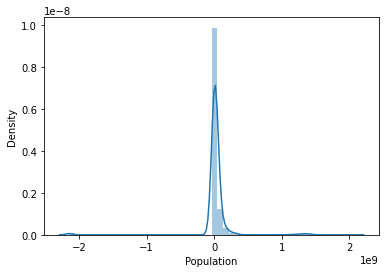

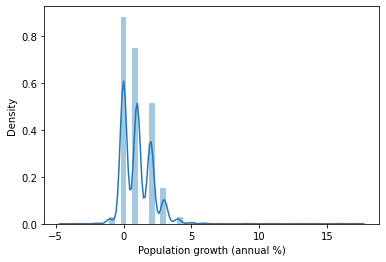

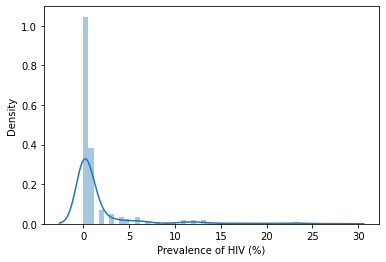

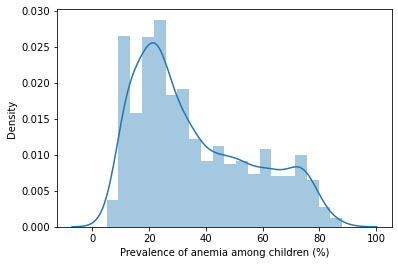

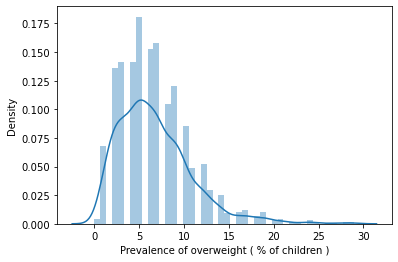

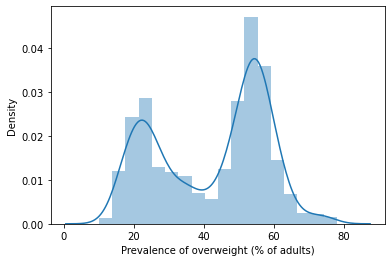

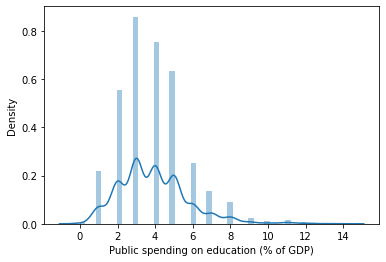

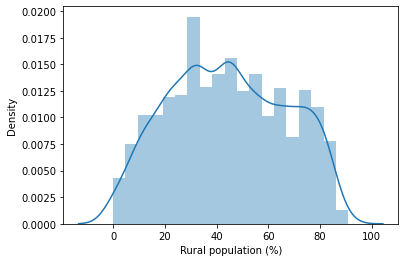

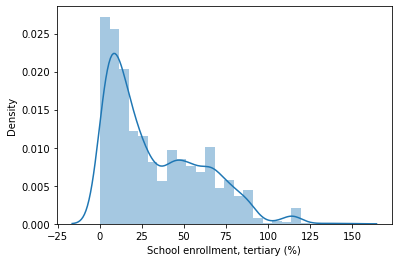

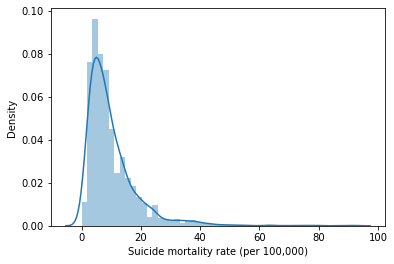

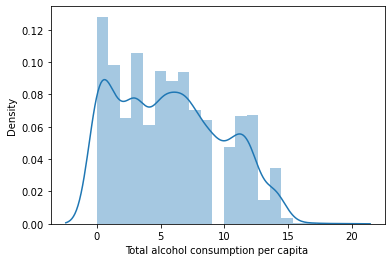

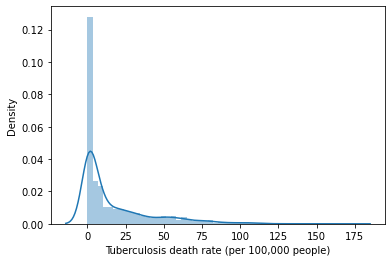

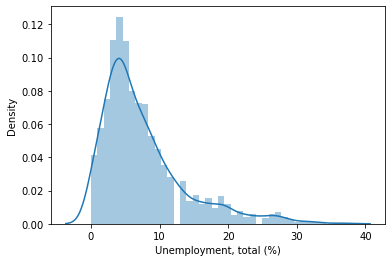

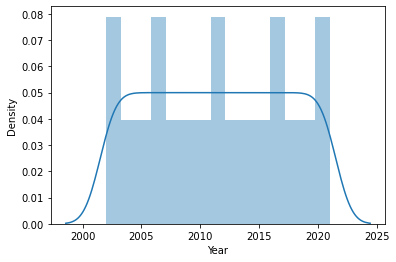

In [12]:
# Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

## Heatmap to check correlation, (output : 'Life expectancy at birth')

,% of adults with hypertension,"Birth rate (per 1,000 people)",Capital health expenditure (% of GDP),"Cause of death, by communicable diseasesl and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),"Current health expenditure per capita, PPP ( $)","Death rate (per 1,000 people)",Diabetes prevalence (% of population ages 20 to 79),Domestic general government health expenditure (% of GDP),"Domestic general government health expenditure per capita, PPP ($)","Domestic private health expenditure per capita, PPP ($)","External health expenditure per capita, PPP ($)","Fertility rate, total (births per woman)",GDP (B$),"GDP per capita, PPP ($)",GNI per capita (US$),"Hospital beds (per 1,000 people)",Human capital index (HCI) (scale 0-1),"Immunization, Pol3 (% children)","Immunization, measles second dose (% of children)","Incidence of HIV (per 1,000 population)","Incidence of malaria (per 1,000 population)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality from CVD, cancer, diabetes or CRD (%)","Mortality rate, infant (per 1,000 live births)","Nurses (per 1,000 people)",Out-of-pocket expenditure (% of current health expenditure),"Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),"Physicians (per 1,000 people)",Population,Population growth (annual %),Prevalence of HIV (%),Prevalence of anemia among children (%),Prevalence of overweight ( % of children ),Prevalence of overweight (% of adults),Public spending on education (% of GDP),Rural population (%),"School enrollment, tertiary (%)","Suicide mortality rate (per 100,000)",Total alcohol consumption per capita,"Tuberculosis death rate (per 100,000 people)","Unemployment, total (%)",Year
0,30,46,0,40,14,44,9,81,11,9,0,0,69,11,7,26,1099,550,0,0,36,30,0,79,189,56,9,34,15,1300,14,42,85,0,85,69,30,0,23680871,4,0,48,5,15,3,77,5,5,0,57,11,2002
1,31,46,0,40,14,44,8,82,10,9,0,6,70,5,7,26,1062,550,0,0,41,30,0,68,189,57,8,34,13,1240,15,41,82,0,86,70,32,0,24726689,4,0,47,5,15,3,77,1,5,0,58,11,2003
2,32,45,0,40,14,44,9,89,10,9,0,4,75,8,7,29,1136,550,0,0,50,2,0,37,189,57,8,34,10,1180,15,41,80,0,84,75,34,0,25654274,4,0,46,5,16,3,77,1,5,0,51,10,2004
3,33,44,0,40,14,44,9,100,10,9,0,5,79,15,6,30,1161,550,0,0,58,9,0,27,189,58,7,34,13,1140,15,40,77,0,78,79,36,0,26433058,3,0,45,5,16,2,77,5,5,0,47,11,2005
4,34,43,0,40,14,44,10,113,9,9,0,5,87,21,6,34,1284,550,0,0,58,18,0,20,189,58,7,34,12,1120,15,40,74,0,76,87,38,0,27100542,2,0,44,5,17,2,77,5,4,0,43,11,2006


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

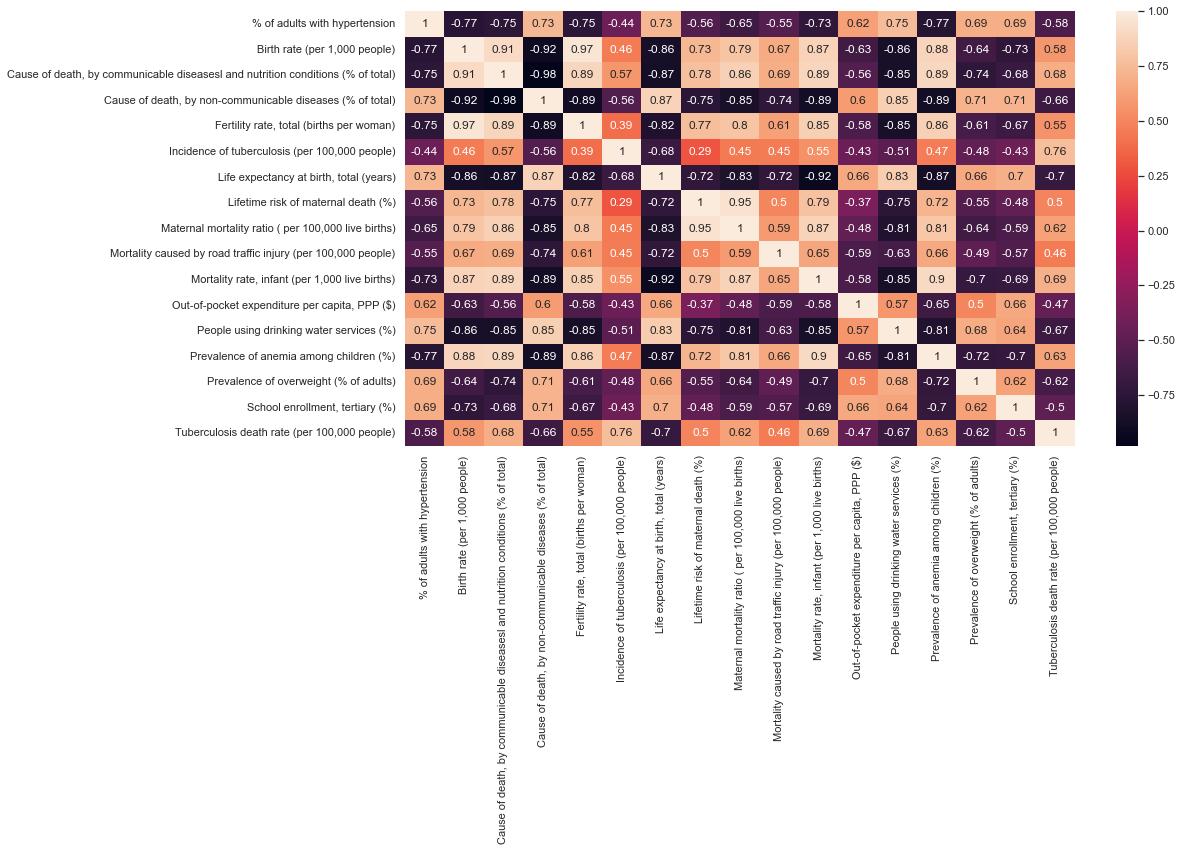

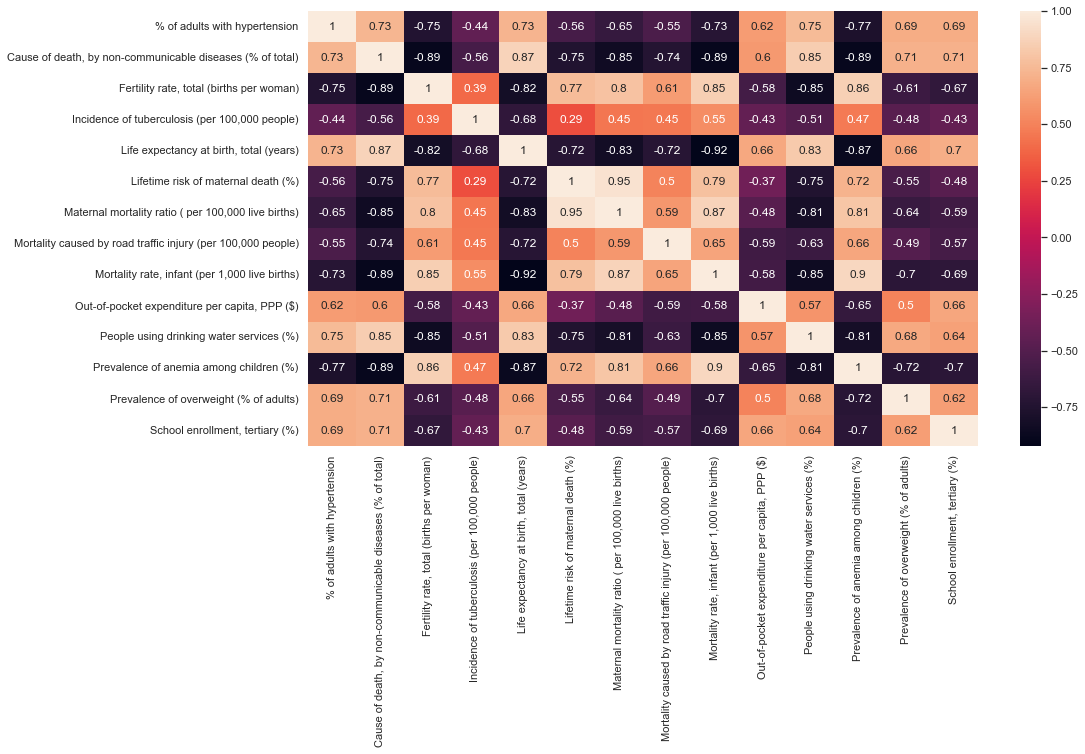

(3280, 14)

In [13]:
num = health.select_dtypes("number")
display(num.head())

cf = 0.65

columns = []
corr_matrix = num.corr()

for col in num.columns:
        if (abs(corr_matrix.loc[col,'Life expectancy at birth, total (years)']) >= cf):
            columns.append(col)
numerical_trimmed = pd.DataFrame(num, columns=columns)
pd.set_option('display.max_columns', None)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

numerical_trimmed = numerical_trimmed.drop(['Tuberculosis death rate (per 100,000 people)',"Birth rate (per 1,000 people)", "Cause of death, by communicable diseasesl and nutrition conditions (% of total)"], axis = 1)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()


numerical_trimmed.shape

## We keep 14 columns out of 54
#### 1 Output to predict : Life expectancy at birth (years)
#### 13 Features : those which has highest correlation to output and the lowest to each other to minimize the Noise & Overfitting

In [14]:
health2 = numerical_trimmed
health2.head()

,% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),Prevalence of overweight (% of adults),"School enrollment, tertiary (%)"
0,30,44,7,189,56,9,1300,14,85,69,30,48,15,5
1,31,44,7,189,57,8,1240,15,82,70,32,47,15,1
2,32,44,7,189,57,8,1180,15,80,75,34,46,16,1
3,33,44,6,189,58,7,1140,15,77,79,36,45,16,5
4,34,44,6,189,58,7,1120,15,74,87,38,44,17,5


### Extraction dataframe for data Viz on Tableau

In [15]:
List = (health["Country Name"], health['Year'], health["GDP per capita, PPP ($)"], health2)
health3 = pd.concat(List, axis=1)
health3.to_excel("Health_Synthesis_tableau.xlsx")


<IPython.core.display.Javascript object>

In [16]:
health2['Life expectancy at birth, total (years)'].describe()

count    3280.000000
mean       69.117073
std         9.078477
min        41.000000
25%        63.000000
50%        71.000000
75%        76.000000
max        84.000000
Name: Life expectancy at birth, total (years), dtype: float64

## Train/test/split data

In [17]:
### X,y split

y = health2["Life expectancy at birth, total (years)"]
x = health2.drop(["Life expectancy at birth, total (years)"], axis = 1)

In [18]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 80)
print(x_train.shape)
print(x_test.shape)

(2624, 13)
(656, 13)


## Scaling & transformation

In [19]:
### Normaliyation by columns 

transformer = MinMaxScaler().fit(x_train)
# filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Notebooks/Transformers/MinMaxScaler.pkl"
# with open(filename, "wb") as file:
#     pickle.dump(transformer, file)
x_train_norm = transformer.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_train_norm

<IPython.core.display.Javascript object>

,% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),Prevalence of overweight (% of adults),"School enrollment, tertiary (%)"
0,0.144928,0.2625,0.500000,0.022642,0.181818,0.212705,0.566038,0.328244,0.018644,0.594937,0.831325,0.205882,0.105634
1,0.768116,0.9125,0.166667,0.012579,0.000000,0.008662,0.188679,0.083969,0.069068,0.936709,0.325301,0.808824,0.802817
2,0.173913,0.3500,0.500000,0.074843,0.181818,0.195380,0.433962,0.374046,0.052542,0.379747,0.566265,0.426471,0.105634
3,0.724638,0.8500,0.166667,0.123270,0.000000,0.022618,0.339623,0.221374,0.075847,0.886076,0.361446,0.529412,0.366197
4,0.304348,0.8000,0.166667,0.059119,0.000000,0.053417,0.433962,0.229008,0.069068,0.645570,0.337349,0.632353,0.077465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,0.101449,0.2250,0.666667,0.200000,0.272727,0.351299,0.509434,0.595420,0.027542,0.481013,0.746988,0.235294,0.035211
2620,0.420290,0.5000,0.333333,0.171069,0.000000,0.093359,0.245283,0.511450,0.028814,0.848101,0.626506,0.191176,0.049296
2621,0.304348,0.8500,0.000000,0.015723,0.000000,0.025024,0.433962,0.137405,0.069068,0.873418,0.325301,0.632353,0.204225
2622,0.782609,0.8875,0.000000,0.003145,0.000000,0.000481,0.169811,0.015267,0.328814,0.987342,0.120482,0.750000,0.859155


In [20]:
scaler = MinMaxScaler().fit(x_test)
filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Scalers/Standard_Scaler_health.pkl"
with open(filename, "wb") as file:
    pickle.dump(scaler, file)
x_test_norm = scaler.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns)
x_test_norm

<IPython.core.display.Javascript object>

,% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),Prevalence of overweight (% of adults),"School enrollment, tertiary (%)"
0,0.676471,0.986111,0.000000,0.023622,0.000000,0.005959,0.140625,0.042017,0.276035,0.881579,0.158537,0.641791,0.331081
1,0.558824,0.333333,0.166667,0.633858,0.000000,0.071514,0.390625,0.226891,0.038269,0.894737,0.414634,0.626866,0.135135
2,0.235294,0.138889,0.500000,0.090551,0.333333,0.478546,0.390625,0.470588,0.040778,0.513158,0.768293,0.313433,0.033784
3,0.661765,0.930556,0.000000,0.003937,0.000000,0.003576,0.125000,0.008403,0.574028,0.986842,0.097561,0.671642,0.337838
4,0.441176,0.097222,0.666667,0.040945,0.444444,0.394517,0.343750,0.495798,0.016311,0.736842,0.902439,0.179104,0.033784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.264706,0.625000,0.166667,0.175591,0.000000,0.141240,0.250000,0.260504,0.021330,0.907895,0.560976,0.179104,0.054054
652,0.411765,0.847222,0.166667,0.012598,0.000000,0.023838,0.187500,0.159664,0.025721,0.921053,0.426829,0.701493,0.168919
653,0.544118,0.888889,0.000000,0.004724,0.000000,0.001192,0.062500,0.008403,0.488080,1.000000,0.073171,0.656716,0.493243
654,0.176471,0.000000,0.833333,0.115748,0.888889,0.737783,0.375000,0.697479,0.029486,0.236842,0.841463,0.134328,0.013514


## Apply the linear model & results

In [21]:

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
MAPE_train = mean_absolute_percentage_error(y_pred_train, y_train)
MAPE_test = mean_absolute_percentage_error(y_pred_test, y_test)


print("R2 score of train dataset is", round(r2_train,3))
print("R2 score of test dataset is", round(r2_test,3))
print()
print("MAPE of train dataset is", round(MAPE_train, 2))
print("MAPE of test dataset is", round(MAPE_test, 2))

filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Models/LM_health.pkl"
with open (filename, "wb") as file:
    pickle.dump(lm, file)

R2 score of train dataset is 0.923
R2 score of test dataset is 0.924

MAPE of train dataset is 0.03
MAPE of test dataset is 0.03


## Apply DecisionTreeRegressor & Results

In [22]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=14,
                             min_samples_split = 8,
                             min_samples_leaf =3,
                             random_state = 42)
regr.fit(x_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(x_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(x_test, y_test)))

filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Models/DTR_health.pkl"
with open (filename, "wb") as file:
    pickle.dump(regr, file)

Train data R2 was: 0.99
Test data R2 was: 0.97


## Apply KNeighborsRegressor & Results

In [23]:
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=3)
regr.fit(x_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(x_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(x_test, y_test)))

filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Models/KNR_health.pkl"
with open (filename, "wb") as file:
    pickle.dump(regr, file)

Train data R2 was: 0.99
Test data R2 was: 0.97


# Hyperparameter search

## Apply RandomForestRegressor + GridSearchCV & Result

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth_choices= [10,12,14]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [8,10,12] 
min_samples_leaf_choices = [4,5,6] 
# Create the  grid 
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

### More detailed search : optimization parameters

In [ ]:
max_depth_choices= [12,13,14]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [7,8,9] 
min_samples_leaf_choices = [2,3,4] 
# Create the  grid 
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

## Apply RandomForestRegressor model & Results

In [25]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=12,
                             min_samples_split = 9,
                             min_samples_leaf =4,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Models/RFR+GridSearchCV_health.pkl"
with open (filename, "wb") as file:
    pickle.dump(clf, file)
    
    
y_pred = clf.predict(x_test_norm)
y_pred = clf.predict(x_test_norm)
print('\n\n What characteristics have an impact on the life expectancy?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance



The R2 for the Random Forest in the TRAIN set is 0.99
The R2 for the Random Forest in the TEST  set is 0.95


 What characteristics have an impact on the life expectancy?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('Mortality rate, infant (per 1,000 live births)', -21.0),
 ('Incidence of tuberculosis (per 100,000 people)', -19.0),
 ('Lifetime risk of maternal death (%)', -8.0),
 ('Mortality caused by road traffic injury (per 100,000 people)', -7.0),
 ('Out-of-pocket expenditure per capita, PPP ($)', 6.0),
 ('Prevalence of anemia among children (%)', -6.0),
 ('Prevalence of overweight (% of adults)', -3.0),
 ('Cause of death, by non-communicable diseases (% of total)', -2.0),
 ('Maternal mortality ratio ( per 100,000 live births)', 2.0),
 ('Fertility rate, total (births per woman)', -2.0),
 ('School enrollment, tertiary (%)', 1.0),
 ('People using drinking water services (%)', 1.0),
 ('% of adults with hypertension', 1.0)]

In [26]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Models/RFR_health.pkl"
with open (filename, "wb") as file:
    pickle.dump(clf, file)
    
    
y_pred = clf.predict(x_test_norm)
y_pred = clf.predict(x_test_norm)
print('\n\n What characteristics have an impact on the life expectancy?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance

The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 0.95


 What characteristics have an impact on the life expectancy?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('Mortality rate, infant (per 1,000 live births)', -21.0),
 ('Incidence of tuberculosis (per 100,000 people)', -19.0),
 ('Lifetime risk of maternal death (%)', -8.0),
 ('Mortality caused by road traffic injury (per 100,000 people)', -7.0),
 ('Out-of-pocket expenditure per capita, PPP ($)', 6.0),
 ('Prevalence of anemia among children (%)', -6.0),
 ('Prevalence of overweight (% of adults)', -3.0),
 ('Cause of death, by non-communicable diseases (% of total)', -2.0),
 ('Maternal mortality ratio ( per 100,000 live births)', 2.0),
 ('Fertility rate, total (births per woman)', -2.0),
 ('School enrollment, tertiary (%)', 1.0),
 ('People using drinking water services (%)', 1.0),
 ('% of adults with hypertension', 1.0)]

## Apply RandomForestRegressor + cross_val_score & Result

In [27]:
from sklearn.model_selection import cross_val_score

y_true = y_train
clf = RandomForestRegressor(max_depth=10,
                             min_samples_split = 9,
                             min_samples_leaf =4,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cross_val_scores_train = cross_val_score(clf, x_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(clf, x_test, y_test, cv=5)


print("The mean R2 Train of the folds was {:.2f}".format(np.mean(cross_val_scores_train)))
print("The mean R2 Test of the folds was {:.2f}".format(np.mean(cross_val_scores_test)))

filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Models/RFR+cross_val_score_health.pkl"
with open (filename, "wb") as file:
    pickle.dump(clf, file)

<IPython.core.display.Javascript object>

The mean R2 Train of the folds was 0.98


<IPython.core.display.Javascript object>

The mean R2 Test of the folds was 0.94


## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= [8,10,12]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [8,10,12] 
min_samples_leaf_choices = [5,6,7] 
# Create the  grid 
random_grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 10) 
random_search.fit(x_train, y_train)
random_search.best_params_